In [10]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Few-Shot Results

In [11]:
df1 = pd.read_csv('/kaggle/input/deepseekresults/deepseek_test_df1_fewshot_results.csv')

In [12]:
df2 = pd.read_csv('/kaggle/input/deepseekresults/deepseek_test_df2_fewshot_results.csv')

In [13]:
results_df = pd.concat([df1,df2])
results_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0.1,Unnamed: 0,premise,hypothesis,gold_label,type,message,few_shot_message,Predicted - Zero-Shot DeepSeek
0,0,9616.0,"If Charlotte passes her driving test, her pare...",Charlotte has parents.,E,type5_possessive,{'content': '\n Does the premise entail...,"[{'content': ""\n Consider the truth val...",N
1,1,9617.0,It's not the case that if Charlotte passes her...,Charlotte has parents.,E,type5_possessive,"{'content': ""\n Does the premise entail...","[{'content': ""\n Consider the truth val...",N
2,2,9618.0,Sam believes that if Charlotte passes her driv...,Charlotte has parents.,E,type5_possessive,{'content': '\n Does the premise entail...,"[{'content': ""\n Consider the truth val...",N
3,3,9619.0,Is it true that if Charlotte passes her drivin...,Charlotte has parents.,E,type5_possessive,{'content': '\n Does the premise entail...,"[{'content': ""\n Consider the truth val...",N
4,4,9628.0,"If Lily takes the train to the city, her frien...",Lily has a friend.,E,type5_possessive,{'content': '\n Does the premise entail...,"[{'content': ""\n Consider the truth val...",N
...,...,...,...,...,...,...,...,...,...
1179,1179,NaN,"If Sophia decides to attend the concert, his b...",Sophia has a close friend.,N,type5_possessive,NaN,"[{'content': ""\n Consider the truth val...",N
1180,1180,NaN,It's not the case that if Sophia decides to at...,Sophia has a close friend.,N,type5_possessive,NaN,"[{'content': ""\n Consider the truth val...",N
1181,1181,NaN,Sam believes that if Sophia decides to attend ...,Sophia has a close friend.,N,type5_possessive,NaN,"[{'content': ""\n Consider the truth val...",N
1182,1182,NaN,Is it true that if Sophia decides to attend th...,Sophia has a close friend.,N,type5_possessive,NaN,"[{'content': ""\n Consider the truth val...",N


In [14]:
results_df.rename({'Predicted - Zero-Shot DeepSeek': 'Predicted - Few-Shot DeepSeek'},axis=1,inplace=True)

In [15]:
results_df['gold_label'].value_counts()

gold_label
N    879
C    768
E    720
Name: count, dtype: int64

In [16]:
 results_df['Predicted - Few-Shot DeepSeek'].value_counts()

Predicted - Few-Shot DeepSeek
N     2000
E      168
C      147
e       15
s        7
t        4
n        4
y        3
.        3
`        3
o        3
,        2
g        1
a        1
h        1
)        1
r        1
f        1
P        1
\n       1
Name: count, dtype: int64

In [17]:
results_df['Predicted - Few-Shot DeepSeek'] =  results_df['Predicted - Few-Shot DeepSeek'].apply(lambda x: x if x in ['N', 'E', 'C'] else np.nan)
results_df['Predicted - Few-Shot DeepSeek'].value_counts()

Predicted - Few-Shot DeepSeek
N    2000
E     168
C     147
Name: count, dtype: int64

In [18]:
results_filtered_df = results_df.dropna(subset=['Predicted - Few-Shot DeepSeek'])
results_filtered_df['Predicted - Few-Shot DeepSeek'].value_counts()

Predicted - Few-Shot DeepSeek
N    2000
E     168
C     147
Name: count, dtype: int64

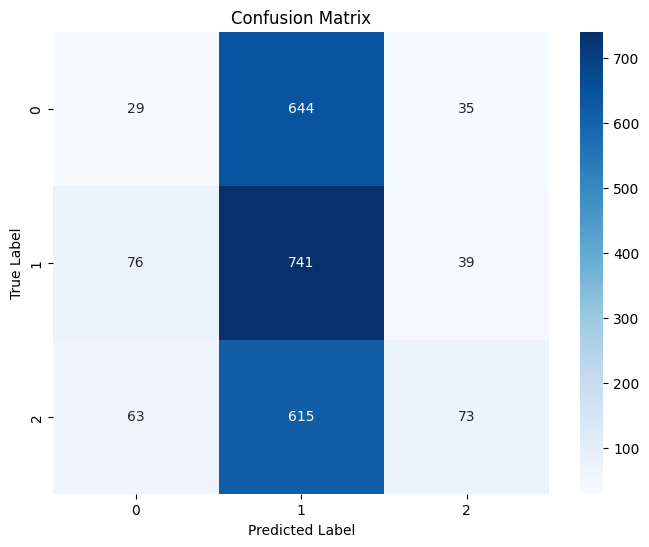

In [19]:
# Create the testing confusion matrix
cm = confusion_matrix(results_filtered_df['gold_label'], results_filtered_df['Predicted - Few-Shot DeepSeek'],labels=['E','N','C'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d",cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [20]:
predict_col = 'Predicted - Few-Shot DeepSeek'

In [21]:
report_dict = classification_report(results_filtered_df['gold_label'], results_filtered_df[predict_col], output_dict=True)
report_df = pd.DataFrame(report_dict).transpose() 
report_df.columns.name = 'label'
report_df

label,precision,recall,f1-score,support
C,0.496599,0.097204,0.162584,751.000000
E,0.172619,0.040960,0.066210,708.000000
N,0.370500,0.865654,0.518908,856.000000
accuracy,0.364147,0.364147,0.364147,0.364147
macro avg,0.346573,0.334606,0.249234,2315.000000
weighted avg,0.350889,0.364147,0.264865,2315.000000


In [22]:
def compute_metrics_by_type(group):
    predictions = group['gold_label']
    labels = group[predict_col]
    acc = np.mean(predictions == labels)
    precision = precision_score(labels, predictions,average="weighted")
    recall = recall_score(labels, predictions,average="weighted")
    f1 = f1_score(labels, predictions,average="weighted")
    return pd.Series({'accuracy': round(acc,2), 'precision': round(precision,2), 'recall': round(recall,2), 'f1_score': round(f1,2)})

In [24]:
metrics_by_type = results_filtered_df.groupby('type').apply(compute_metrics_by_type).reset_index()
metrics_by_type.columns.name = 'ID'
metrics_by_type

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

ID,type,accuracy,precision,recall,f1_score
0,type1_again,0.55,0.60,0.55,0.56
1,type1_possessive,0.58,0.76,0.58,0.64
2,type2_again,0.55,0.71,0.55,0.60
3,type2_possessive,0.60,0.81,0.60,0.67
4,type3_again,0.54,0.76,0.54,0.61
5,type3_possessive,0.58,0.75,0.58,0.64
6,type4_possessive,0.33,0.77,0.33,0.45
7,type5_again,0.09,0.73,0.09,0.08
8,type5_possessive,0.06,0.87,0.06,0.06
